In [112]:
# EDA setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

# Show plots inline in Jupyter
%matplotlib inline

# Create a folder to save visualizations
os.makedirs("visualizations", exist_ok=True)

# Load datasets
deliveries = pd.read_csv("data/transformed/deliveries.csv")
odi_matches = pd.read_csv("data/transformed/odi_matches.csv")
t20_matches = pd.read_csv("data/transformed/t20_matches.csv")
test_matches = pd.read_csv("data/transformed/test_matches.csv")


/var/folders/49/9521_b111c51t4l5cx5p77d40000gn/T/ipykernel_5074/3130465071.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette="viridis")


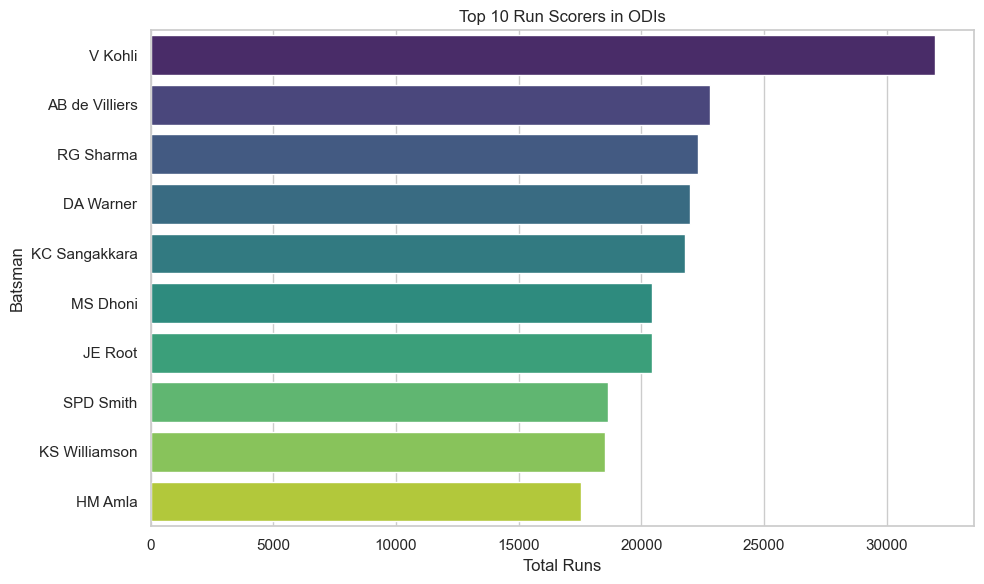

In [113]:
#1.top 10 run-scorers in ODIs
top_batsmen = deliveries.groupby('batsman')['runs_batter'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette="viridis")
plt.title("Top 10 Run Scorers in ODIs")
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.tight_layout()
plt.savefig("visualizations/top_10_batsmen_ODI.png")
plt.show()


/var/folders/49/9521_b111c51t4l5cx5p77d40000gn/T/ipykernel_5074/462992385.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette="magma")


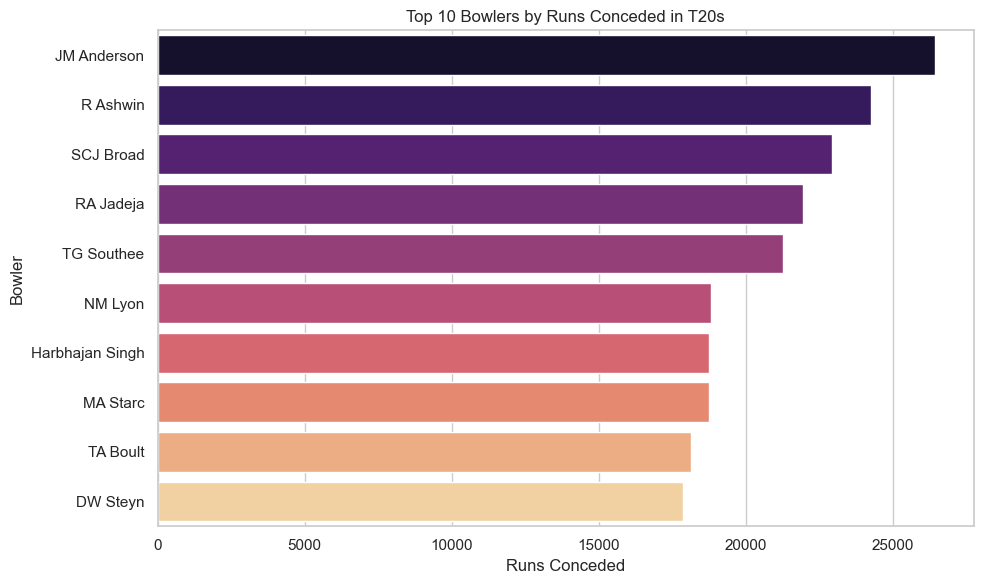

In [114]:
#2.top 10 bowlers by runs conceded
top_bowlers = deliveries.groupby('bowler')['runs_total'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette="magma")
plt.title("Top 10 Bowlers by Runs Conceded in T20s")
plt.xlabel("Runs Conceded")
plt.ylabel("Bowler")
plt.tight_layout()
# Save figure
plt.savefig("visualizations/top10_bowlers_by_runs_conceded.png")
plt.show()

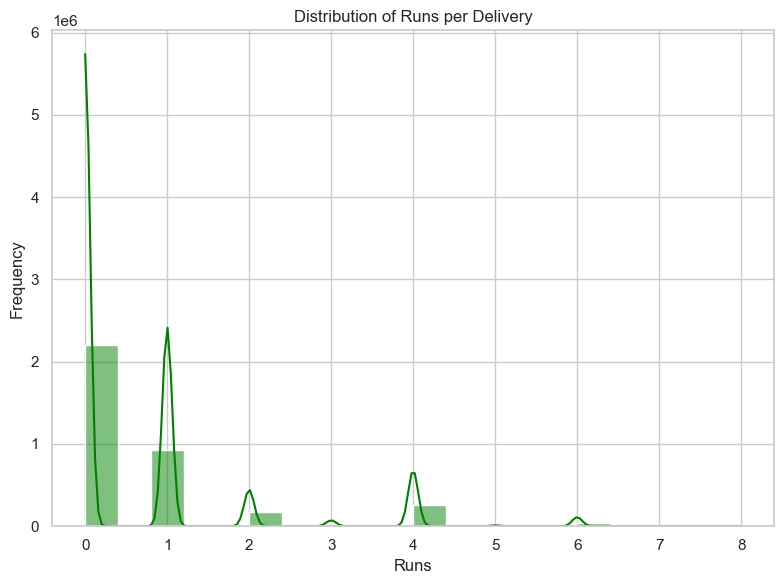

In [115]:
# 3.Distribution of runs per delivery
plt.figure(figsize=(8,6))
sns.histplot(deliveries['runs_total'], bins=20, kde=True, color='green')
plt.title("Distribution of Runs per Delivery")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("visualizations/runs_distribution.png")
plt.show()

  match_format        winner
0          odi  South Africa
1          odi         India
2          odi   New Zealand
3          odi         India
4          odi          None


/var/folders/49/9521_b111c51t4l5cx5p77d40000gn/T/ipykernel_5074/3753923119.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wins.values, y=team_wins.index, palette="cubehelix")


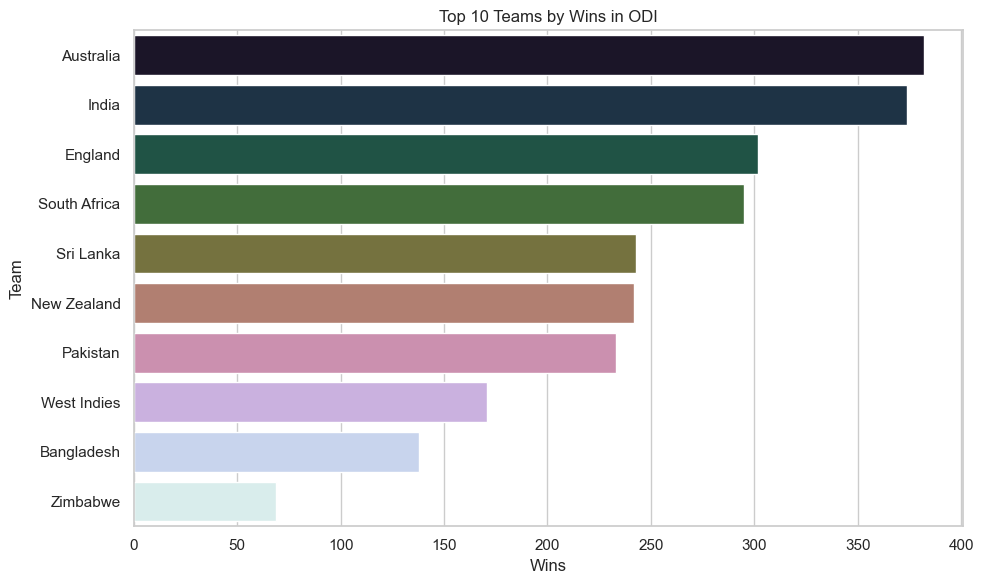

In [116]:
#4.Top 10 teams by win count in ODI
import ast  # to safely parse string dictionaries

# Convert 'info' from string to dictionary if needed
odi_matches['info'] = odi_matches['info'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extract winner safely
odi_matches['winner'] = odi_matches['info'].apply(
    lambda x: x.get('outcome', {}).get('winner') if isinstance(x, dict) else None
)

# Check if extraction worked
print(odi_matches[['match_format', 'winner']].head())

# Top 10 teams by wins
team_wins = odi_matches['winner'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=team_wins.values, y=team_wins.index, palette="cubehelix")
plt.title("Top 10 Teams by Wins in ODI")
plt.xlabel("Wins")
plt.ylabel("Team")
plt.tight_layout()
plt.savefig("visualizations/top_teams_ODI.png")
plt.show()



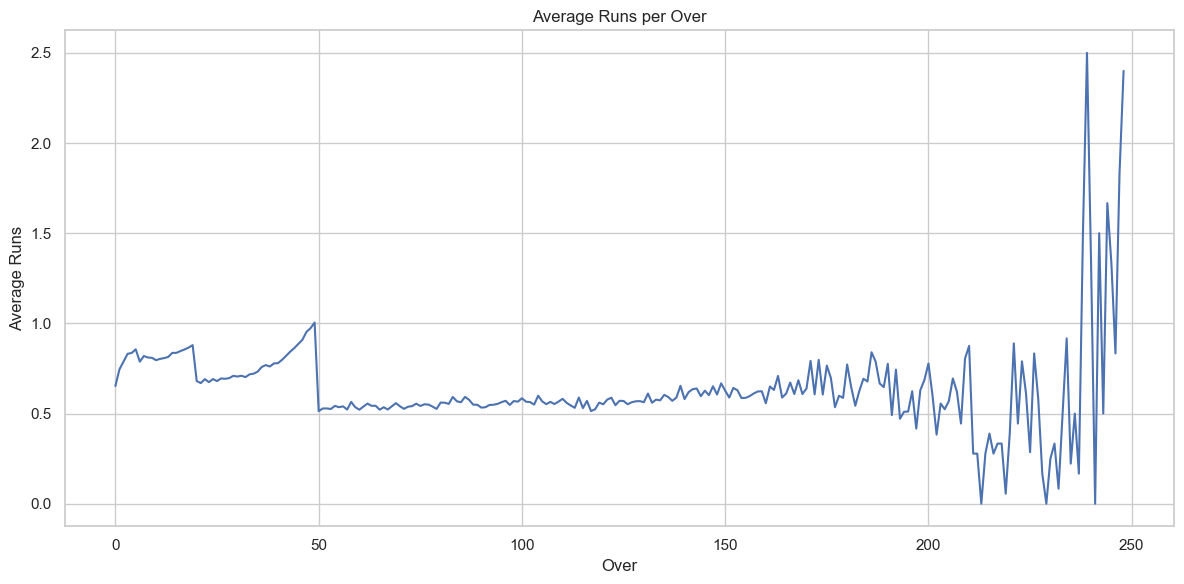

In [117]:
#5.Average runs per over (ODI)
deliveries['over'] = deliveries['over'].astype(int)
avg_runs_over = deliveries.groupby('over')['runs_total'].mean()
plt.figure(figsize=(12,6))
sns.lineplot(x=avg_runs_over.index, y=avg_runs_over.values)
plt.title("Average Runs per Over")
plt.xlabel("Over")
plt.ylabel("Average Runs")
plt.tight_layout()
plt.savefig("visualizations/avg_runs_per_over.png")
plt.show()


/var/folders/49/9521_b111c51t4l5cx5p77d40000gn/T/ipykernel_5074/1020914617.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_winners.values, y=top_winners.index, palette="viridis")


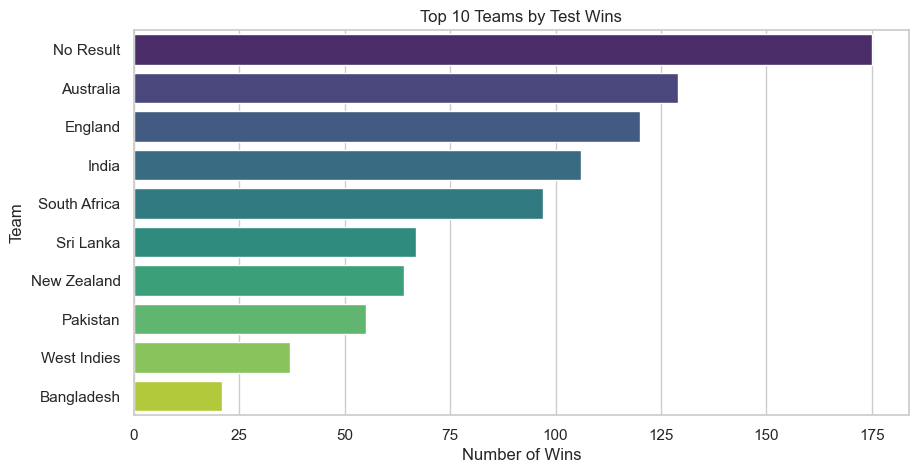

In [118]:

# 6.Top 10 Teams by Test Wins
# If info column is JSON/dict-like, convert to dict
import ast

# Convert 'info' strings to actual dictionaries (if needed)
test_matches['info'] = test_matches['info'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extract winner from info
test_matches['winner'] = test_matches['info'].apply(lambda x: x.get('outcome', {}).get('winner', 'No Result'))

# Now you can do the Top 10 Teams by Test Wins
top_winners = test_matches['winner'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_winners.values, y=top_winners.index, palette="viridis")
plt.title("Top 10 Teams by Test Wins")
plt.xlabel("Number of Wins")
plt.ylabel("Team")
plt.savefig("visualizations/test_top10_wins.png")
plt.show()


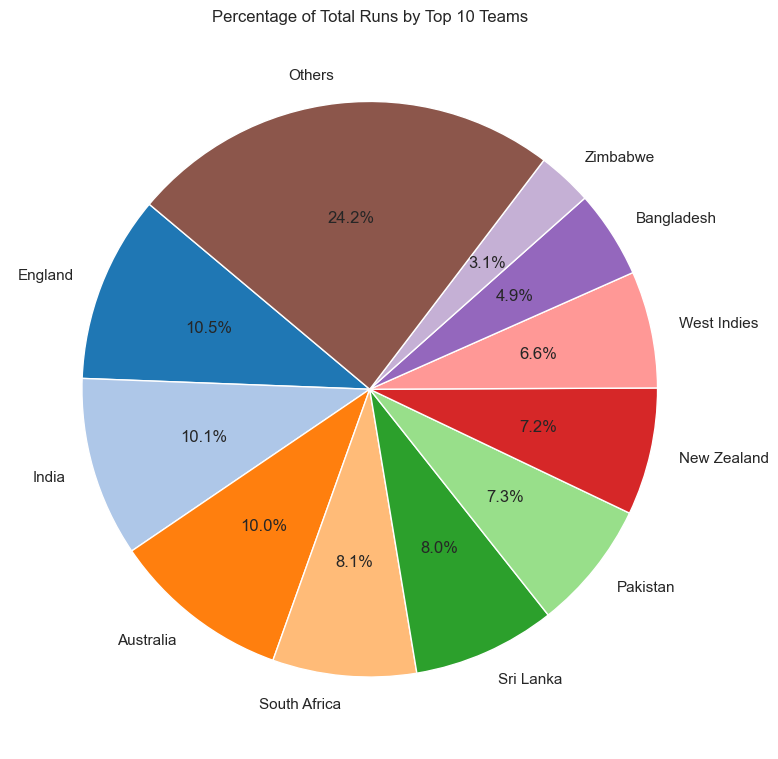

In [119]:

# 7. Percentage of Runs by Top 10 Batting Teams
team_runs = deliveries.groupby('batting_team')['runs_total'].sum()
top_10 = team_runs.sort_values(ascending=False).head(10)
others = team_runs.sum() - top_10.sum()
top_10['Others'] = others

plt.figure(figsize=(8,8))
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Percentage of Total Runs by Top 10 Teams")
plt.tight_layout()
plt.savefig("visualizations/runs_by_top10_teams_pie.png")
plt.show()


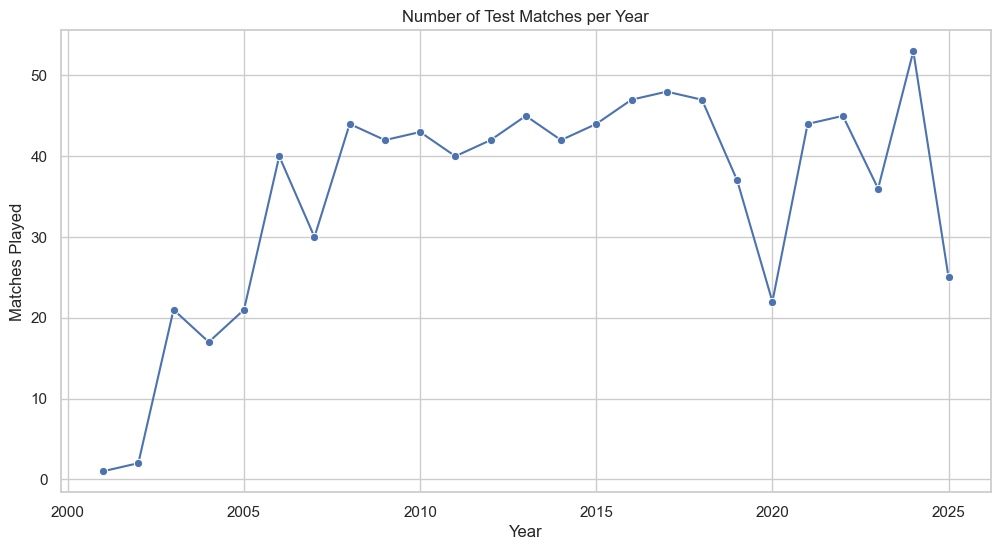

In [120]:
# 8. Matches per Year
import ast

# Convert info to dict if it's a string
test_matches['info'] = test_matches['info'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extract year from date (assuming info has 'dates' key)
test_matches['year'] = test_matches['info'].apply(lambda x: int(x['dates'][0][:4]) if 'dates' in x and x['dates'] else None)

# Drop rows with no year
test_matches_year = test_matches.dropna(subset=['year'])

# Count matches per year
matches_per_year = test_matches_year['year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=matches_per_year.index, y=matches_per_year.values, marker="o")
plt.title("Number of Test Matches per Year")
plt.xlabel("Year")
plt.ylabel("Matches Played")
plt.savefig("visualizations/test_matches_per_year.png")
plt.show()



/var/folders/49/9521_b111c51t4l5cx5p77d40000gn/T/ipykernel_5074/1462632764.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=strike_rate.values, y=strike_rate.index, palette="coolwarm")


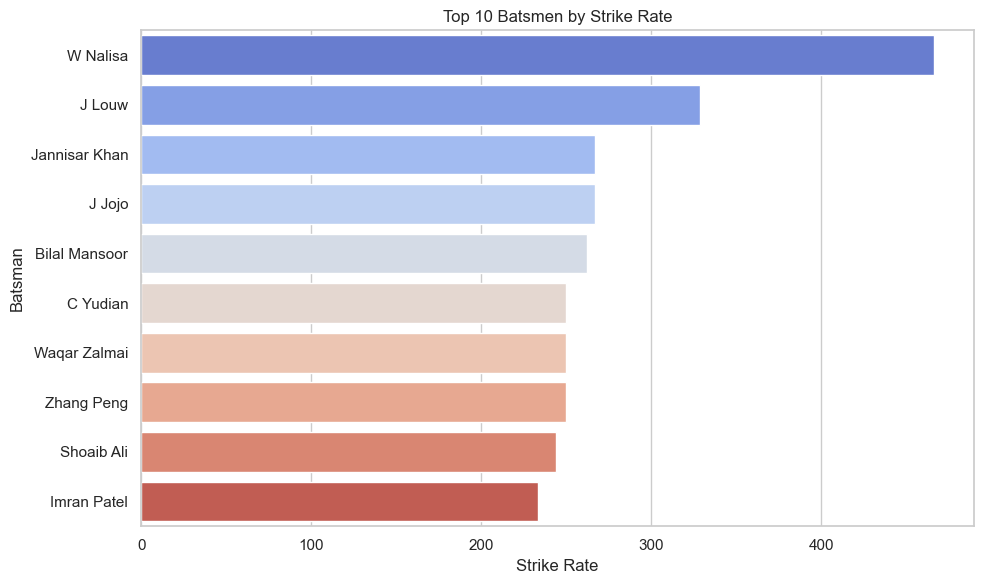

In [121]:
# 9.Top 10 Batsmen by Strike Rate

balls_faced = deliveries.groupby('batsman').size()
runs_scored = deliveries.groupby('batsman')['runs_total'].sum()

# Strike rate = (runs / balls) * 100
strike_rate = (runs_scored / balls_faced * 100).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=strike_rate.values, y=strike_rate.index, palette="coolwarm")
plt.title("Top 10 Batsmen by Strike Rate")
plt.xlabel("Strike Rate")
plt.ylabel("Batsman")
plt.tight_layout()
plt.savefig("visualizations/top_strike_rate_batsmen.png")
plt.show()

/var/folders/49/9521_b111c51t4l5cx5p77d40000gn/T/ipykernel_5074/3369882543.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_venues.values, y=top_venues.index, palette="mako")


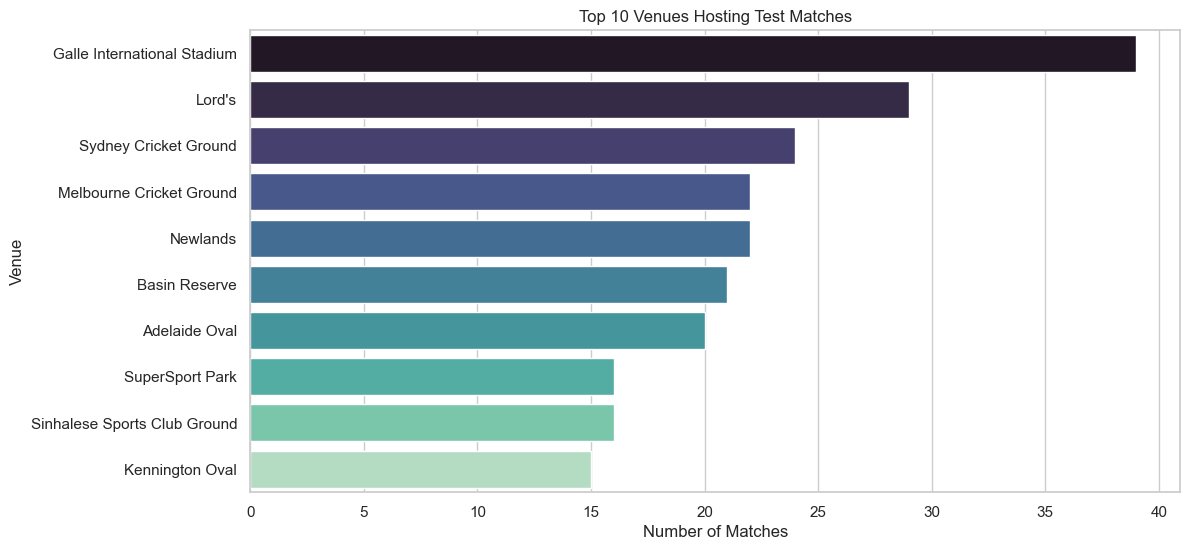

In [122]:
# 10.Top Venues Hosting Test Matches
import ast

# Convert info to dict if stored as string
test_matches['info'] = test_matches['info'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extract venue from info
test_matches['venue'] = test_matches['info'].apply(lambda x: x.get('venue', 'Unknown'))

# Count top 10 venues
top_venues = test_matches['venue'].value_counts().head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_venues.values, y=top_venues.index, palette="mako")
plt.title("Top 10 Venues Hosting Test Matches")
plt.xlabel("Number of Matches")
plt.ylabel("Venue")
plt.savefig("visualizations/test_top_venues.png")
plt.show()


In [126]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN

prs = Presentation()

# -------------------------
# 1. Introduction Slide
# -------------------------
intro_slide = prs.slides.add_slide(prs.slide_layouts[0])  # Title slide layout

# Set title and subtitle
intro_slide.shapes.title.text = "Cricket EDA Analysis"
intro_slide.placeholders[1].text = "A summary of ODI, T20, and Test match insights using Python"

# Optional: center the subtitle
intro_slide.placeholders[1].text_frame.paragraphs[0].alignment = PP_ALIGN.CENTER

# -------------------------
# 2. Visualization Slides
# -------------------------
slides_titles = [
    "Top 10 Run Scorers in ODIs", "Top 10 Bowlers by Runs Conceded in T20s", "Distribution of Runs per Delivery",
    "Top 10 Teams by Wins in ODI", "Average runs per over (ODI)", "Top 10 Teams by Test Wins",
    "Percentage of Total Runs by Top 10 Teams", "Number of Test Matches per Year", "Top 10 Batsmen by Strike Rate",
    "Top 10 Venues Hosting Test Matches"
]

slides_imgs = [
    "visualizations/top_10_batsmen_ODI.png",
    "visualizations/top10_bowlers_by_runs_conceded.png",
    "visualizations/runs_distribution.png",
    "visualizations/top_teams_ODI.png",
    "visualizations/avg_runs_per_over.png",
    "visualizations/test_top10_wins.png",
    "visualizations/runs_by_top10_teams_pie.png",
    "visualizations/test_matches_per_year.png",
    "visualizations/top_strike_rate_batsmen.png",
    "visualizations/test_top_venues.png"
]

for title, img in zip(slides_titles, slides_imgs):
    slide = prs.slides.add_slide(prs.slide_layouts[5])  # Blank slide
    # Add title
    title_shape = slide.shapes.add_textbox(Inches(0.5), Inches(0.2), Inches(9), Inches(1))
    title_shape.text = title
    # Add image
    slide.shapes.add_picture(img, Inches(1), Inches(1.5), width=Inches(8), height=Inches(4.5))

# -------------------------
# 3. Save Presentation
# -------------------------
prs.save("Cricket_EDA_Presentation.pptx")
print("✅ Presentation saved as Cricket_EDA_Presentation.pptx")


✅ Presentation saved as Cricket_EDA_Presentation.pptx


In [124]:
#!pip install python-pptx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 6.3 MB/s  0:00:016.3 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [python-pptx] 1/3 [lxml]
